In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as  sns

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import accuracy_score, confusion_matrix


In [ ]:
train = pd.read_csv('/content/drive/MyDrive/ILOVEDART/train.csv')
test = pd.read_csv('/content/drive/MyDrive/ILOVEDART/test.csv')
sample_sub = pd.read_csv('/content/drive/MyDrive/ILOVEDART/sample_submission.csv')

id  : 매물 고유 아이디\
brand : 차 브랜드\
model : 차량 모델명\
release year : 차량 제조 연도\
mileage : 차량 주행 거리\
fuel type : 차량 연료 유형\
engine : 차량 엔진 타입\
transmission : 차량 변속기 유형\
exterior color : 차량 외장 색상\
interior color : 차량 내장 색상\
accident report : 차량 사고 이력\
clear title : 클린 타이틀(운행에 중대한 지장을 주는 사고 X)\
price : 가격


# 전처리



In [ ]:
test = pd.read_csv('/content/drive/MyDrive/ILOVEDART/test.csv')

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150826 entries, 0 to 150825
Data columns (total 13 columns):
 #   Column           Non-Null Count   Dtype 
---  ------           --------------   ----- 
 0   id               150826 non-null  int64 
 1   brand            150826 non-null  object
 2   model            150826 non-null  object
 3   release_year     150826 non-null  int64 
 4   milage           150826 non-null  object
 5   fuel_type        146741 non-null  object
 6   engine           150826 non-null  object
 7   transmission     150826 non-null  object
 8   exterior_color   150826 non-null  object
 9   interior_color   150826 non-null  object
 10  accident_report  148835 non-null  object
 11  clean_title      133621 non-null  object
 12  price            150826 non-null  int64 
dtypes: int64(3), object(10)
memory usage: 15.0+ MB


In [ ]:
train.isna()

,id,brand,model,release_year,milage,fuel_type,engine,transmission,exterior_color,interior_color,accident_report,clean_title,price
0,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
150821,False,False,False,False,False,False,False,False,False,False,False,False,False
150822,False,False,False,False,False,False,False,False,False,False,False,False,False
150823,False,False,False,False,False,False,False,False,False,False,False,True,False
150824,False,False,False,False,False,False,False,False,False,False,False,False,False


In [ ]:
train.isna().sum()

,0
id,0
brand,0
model,0
release_year,0
milage,0
fuel_type,4085
engine,0
transmission,0
exterior_color,0
interior_color,0


In [ ]:
df_cleaned = test.copy()

In [ ]:
# 'brand'가 'Tesla'인 행의 'fuel_type'을 'electric'으로 변경
df_cleaned.loc[df_cleaned['brand'] == 'Tesla', 'fuel_type'] = 'electric'

df_cleaned.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37707 entries, 0 to 37706
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   id               37707 non-null  int64 
 1   brand            37707 non-null  object
 2   model            37707 non-null  object
 3   release_year     37707 non-null  int64 
 4   milage           37707 non-null  object
 5   fuel_type        37354 non-null  object
 6   engine           37707 non-null  object
 7   transmission     37707 non-null  object
 8   exterior_color   37707 non-null  object
 9   interior_color   37707 non-null  object
 10  accident_report  37246 non-null  object
 11  clean_title      33493 non-null  object
dtypes: int64(2), object(10)
memory usage: 3.5+ MB


In [ ]:
# fuel_type 칼럼의 최빈값 확인
most_common_fuel_type = df_cleaned['fuel_type'].value_counts().idxmax()

# 결측치를 최빈값으로 채우기
df_cleaned['fuel_type'].fillna(most_common_fuel_type, inplace=True)

# 결과 확인
print(df_cleaned['fuel_type'].isnull().sum())  # 결측치가 0인지 확인


0


In [ ]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37707 entries, 0 to 37706
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   id               37707 non-null  int64 
 1   brand            37707 non-null  object
 2   model            37707 non-null  object
 3   release_year     37707 non-null  int64 
 4   milage           37707 non-null  object
 5   fuel_type        37707 non-null  object
 6   engine           37707 non-null  object
 7   transmission     37707 non-null  object
 8   exterior_color   37707 non-null  object
 9   interior_color   37707 non-null  object
 10  accident_report  37246 non-null  object
 11  clean_title      33493 non-null  object
dtypes: int64(2), object(10)
memory usage: 3.5+ MB


In [ ]:
df_cleaned['clean_title'].value_counts()

,count
clean_title,
Yes,133597


In [ ]:
df_cleaned['clean_title'].isna().sum()

15225

In [ ]:
df_cleaned[df_cleaned['clean_title'].isna()]

,id,brand,model,release_year,milage,fuel_type,engine,transmission,exterior_color,interior_color,accident_report,clean_title,price
8,8,Buick,Envision Essence,2022,20.104k,Gasoline,2.5L I4 16V GDI DOHC,9-Speed Automatic,Summit White,Jet Black,None reported,NaN,27785
21,21,Mercedes-Benz,AMG G 63 Base,2023,19.593k,Gasoline,4.0L V8 32V GDI DOHC Twin Turbo,9-Speed Automatic,Gray,Black,None reported,NaN,107900
45,45,Mercedes-Benz,AMG GT 53 Base,2022,1.966k,Gasoline,4.0L V8 32V MPFI DOHC Twin Turbo,9-Speed Automatic,Vega Blue,Black,None reported,NaN,46599
51,51,Cadillac,Escalade ESV Premium Luxury Platinum,2022,16.648k,Gasoline,3.0L V6 24V GDI DOHC Twin Turbo,10-Speed Automatic with Overdrive,Black,Ebony,1 or more accident reported,NaN,69900
53,53,Porsche,Cayman GT4,2018,73.549k,Gasoline,3.4L H6 24V MPFI DOHC,6-Speed Manual,Alpine White,Black,None reported,NaN,44750
...,...,...,...,...,...,...,...,...,...,...,...,...,...
150784,150784,Mercedes-Benz,SL-Class SL550 Roadster,2022,13.613k,Gasoline,4.0 Liter Twin Turbo,Automatic,Silver,Black,None reported,NaN,28998
150798,150798,Nissan,Murano SV,2020,20.598k,Gasoline,2.5L I4 16V PDI DOHC Turbo,Automatic CVT,Sunset Drift Chromaflair,Graphite,None reported,NaN,25498
150814,150814,Chevrolet,Silverado 1500 ZR2,2022,4.785k,Gasoline,6.2L V8 16V GDI OHV,Automatic,Glacier Blue Metallic,Jet Black,None reported,NaN,68590
150817,150817,RAM,1500 Big Horn,2022,14.92k,Gasoline,5.7L V8 16V MPFI OHV,8-Speed Automatic,Maximum Steel Metallic,Black,None reported,NaN,41299


In [ ]:
# 'accident_report'가 'None_reported'이고, 'clean_title'이 NaN인 행에서 'clean_title' 값을 'Yes'로 변경
df_cleaned.loc[(df_cleaned['accident_report'] == 'None reported') & (df_cleaned['clean_title'].isna()), 'clean_title'] = 'Yes'

# 변경된 데이터 확인
print(df_cleaned[(df_cleaned['accident_report'] == 'None reported') & (df_cleaned['clean_title'] == 'Yes')])


          id          brand                     model  release_year   milage  \
0          0  Mercedes-Benz  AMG C 43 AMG C 43 4MATIC          2019    36.0k   
1          1  Mercedes-Benz             EQS 450+ Base          2017    66.0k   
2          2          Tesla   Model X Long Range Plus          2019    55.0k   
5          5            BMW     M4 Competition xDrive          2023     3.5k   
7          7          Mazda           MX-5 Miata Club          2022  20.561k   
...      ...            ...                       ...           ...      ...   
37701  37701          Dodge    Challenger SRT Hellcat          2018   8.228k   
37702  37702        Hyundai             Veloster Base          2012   107.5k   
37704  37704        Porsche                Panamera 2          2014    29.5k   
37705  37705           Ford          Explorer Limited          2021  37.806k   
37706  37706       Cadillac        Escalade ESV Sport          2021     7.4k   

      fuel_type                        

In [ ]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37707 entries, 0 to 37706
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   id               37707 non-null  int64 
 1   brand            37707 non-null  object
 2   model            37707 non-null  object
 3   release_year     37707 non-null  int64 
 4   milage           37707 non-null  object
 5   fuel_type        37707 non-null  object
 6   engine           37707 non-null  object
 7   transmission     37707 non-null  object
 8   exterior_color   37707 non-null  object
 9   interior_color   37707 non-null  object
 10  accident_report  37246 non-null  object
 11  clean_title      37032 non-null  object
dtypes: int64(2), object(10)
memory usage: 3.5+ MB


In [ ]:
df_cleaned[df_cleaned['clean_title'].isna()]

,id,brand,model,release_year,milage,fuel_type,engine,transmission,exterior_color,interior_color,accident_report,clean_title
28,28,Toyota,Sequoia Platinum,2023,1.24k,Hybrid,437.0HP 3.4L V6 Cylinder Engine Gas/Electric H...,10-Speed Automatic Transmission,Brown,Black,NaN,NaN
74,74,RAM,1500 Laramie,2020,107.714k,Gasoline,5.7L V8 16V MPFI OHV,8-Speed Automatic,Bright White Clearcoat,Black,1 or more accident reported,NaN
75,75,Mercedes-Benz,C-Class C 300 4MATIC,2019,49.86k,Gasoline,2.0L I4 16V GDI DOHC Turbo,9-Speed Automatic,Obsidian Black Metallic,Black,1 or more accident reported,NaN
109,109,Buick,Envision Essence,2020,25.968k,Gasoline,2.5L I4 16V GDI DOHC,9-Speed Automatic,Ebony Twilight Metallic,Ebony,1 or more accident reported,NaN
186,186,Jeep,Grand Cherokee L Laredo,2021,43.329k,Gasoline,3.6L V6 24V MPFI DOHC,Automatic,Metallic,Global Black,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
37460,37460,Land,Rover Range Rover HSE SWB,2022,12.5k,Hybrid,395.0HP 3.0L Straight 6 Cylinder Engine Gasoli...,Automatic Transmission,Black,Beige,NaN,NaN
37611,37611,Land,Rover Range Rover Sport HST MHEV,2021,22.27k,Gasoline,395.0HP 3.0L Straight 6 Cylinder Engine Gasoli...,Automatic Transmission,Silver,Black,NaN,NaN
37639,37639,Ford,Transit Connect XLT,2020,119.85k,Gasoline,169.0HP 2.5L 4 Cylinder Engine Gasoline Fuel,6-Speed Automatic Transmission,White,Black,NaN,NaN
37693,37693,Tesla,Model X Long Range,2022,12.055k,electric,670.0HP Electric Motor Electric Fuel System,Automatic Transmission,Blue,Black,NaN,NaN


In [ ]:
df_cleaned['clean_title'] = df_cleaned['clean_title'].fillna('No')


In [ ]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37707 entries, 0 to 37706
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   id               37707 non-null  int64 
 1   brand            37707 non-null  object
 2   model            37707 non-null  object
 3   release_year     37707 non-null  int64 
 4   milage           37707 non-null  object
 5   fuel_type        37707 non-null  object
 6   engine           37707 non-null  object
 7   transmission     37707 non-null  object
 8   exterior_color   37707 non-null  object
 9   interior_color   37707 non-null  object
 10  accident_report  37246 non-null  object
 11  clean_title      37707 non-null  object
dtypes: int64(2), object(10)
memory usage: 3.5+ MB


In [ ]:
df_cleaned.head(30)

,id,brand,model,release_year,milage,fuel_type,engine,transmission,exterior_color,interior_color,accident_report,clean_title,price
0,0,Jeep,Gladiator Overland,2019,4.1k,Gasoline,285.0HP 3.6L V6 Cylinder Engine Gasoline Fuel,Automatic Transmission,Red,–,None reported,Yes,47500
1,1,Chrysler,300M Base,2004,45.0k,Gasoline,250.0HP 3.5L V6 Cylinder Engine Gasoline Fuel,Automatic Transmission,Silver,Black,None reported,Yes,8250
2,2,Hyundai,Genesis Coupe 3.8 Track,2010,11.5k,Gasoline,306.0HP 3.8L V6 Cylinder Engine Gasoline Fuel,Transmission with Dual Shift Mode,Silver,Black,1 or more accident reported,Yes,12000
3,3,Ford,F-150 Lariat,2013,28.0k,Gasoline,400.0HP 3.5L V6 Cylinder Engine Gasoline Fuel,6-Speed Automatic Transmission,Gray,Black,1 or more accident reported,Yes,13000
4,4,Mercedes-Benz,SL-Class SL550 Roadster,2010,21.3k,Gasoline,382.0HP 5.5L 8 Cylinder Engine Gasoline Fuel,7-Speed Automatic Transmission,Black,Black,1 or more accident reported,Yes,15400
5,5,Chevrolet,Impala 1LT,2018,108.206k,Gasoline,3.2L V6 24V MPFI DOHC,Automatic,Ebony Twilight Metallic,Jet Black,1 or more accident reported,Yes,44888
6,6,Ford,F-250 King Ranch,2016,78.101k,Diesel,440.0HP 6.7L 8 Cylinder Engine Diesel Fuel,6-Speed Automatic Transmission,Black,Brown,None reported,Yes,22000
7,7,Mercedes-Benz,E-Class E 350,2017,61.3k,Gasoline,302.0HP 3.5L V6 Cylinder Engine Gasoline Fuel,Automatic Transmission,White,–,None reported,Yes,29000
8,8,Buick,Envision Essence,2022,20.104k,Gasoline,2.5L I4 16V GDI DOHC,9-Speed Automatic,Summit White,Jet Black,None reported,Yes,27785
9,9,Genesis,G80 3.8,2017,85.5k,Gasoline,355.0HP 5.3L 8 Cylinder Engine Gasoline Fuel,Transmission Overdrive Switch,Brown,Black,None reported,Yes,23000


In [ ]:
# accident_report 컬럼의 최빈값 확인
most_common_accident_report = df_cleaned['accident_report'].value_counts().idxmax()

# 결측치를 최빈값으로 채우기
df_cleaned['accident_report'].fillna(most_common_accident_report, inplace=True)

# 결과 확인
print(df_cleaned['accident_report'].isnull().sum())  # 결측치가 0인지 확인


0


<ipython-input-19-e7242b0580f3>:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_cleaned['accident_report'].fillna(most_common_accident_report, inplace=True)


In [ ]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37707 entries, 0 to 37706
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   id               37707 non-null  int64 
 1   brand            37707 non-null  object
 2   model            37707 non-null  object
 3   release_year     37707 non-null  int64 
 4   milage           37707 non-null  object
 5   fuel_type        37707 non-null  object
 6   engine           37707 non-null  object
 7   transmission     37707 non-null  object
 8   exterior_color   37707 non-null  object
 9   interior_color   37707 non-null  object
 10  accident_report  37707 non-null  object
 11  clean_title      37707 non-null  object
dtypes: int64(2), object(10)
memory usage: 3.5+ MB


## 엔진 칼럼

In [ ]:
df_cleaned['engine'].value_counts()

,count
engine,
355.0HP 5.3L 8 Cylinder Engine Gasoline Fuel,2740
240.0HP 2.0L 4 Cylinder Engine Gasoline Fuel,2316
420.0HP 6.2L 8 Cylinder Engine Gasoline Fuel,2256
2.0L I4 16V GDI DOHC Turbo,2091
340.0HP 3.0L V6 Cylinder Engine Gasoline Fuel,1955
...,...
78.0HP 1.2L 3 Cylinder Engine Gasoline Fuel,1
139.0HP 1.6L 4 Cylinder Engine Gas/Electric Hybrid,1
141.0HP 2.0L 4 Cylinder Engine Gasoline Fuel,1


In [ ]:
df_cleaned.head()

,id,brand,model,release_year,milage,fuel_type,engine,transmission,exterior_color,interior_color,accident_report,clean_title,price
0,0,Jeep,Gladiator Overland,2019,4.1k,Gasoline,285.0HP 3.6L V6 Cylinder Engine Gasoline Fuel,Automatic Transmission,Red,–,None reported,Yes,47500
1,1,Chrysler,300M Base,2004,45.0k,Gasoline,250.0HP 3.5L V6 Cylinder Engine Gasoline Fuel,Automatic Transmission,Silver,Black,None reported,Yes,8250
2,2,Hyundai,Genesis Coupe 3.8 Track,2010,11.5k,Gasoline,306.0HP 3.8L V6 Cylinder Engine Gasoline Fuel,Transmission with Dual Shift Mode,Silver,Black,1 or more accident reported,Yes,12000
3,3,Ford,F-150 Lariat,2013,28.0k,Gasoline,400.0HP 3.5L V6 Cylinder Engine Gasoline Fuel,6-Speed Automatic Transmission,Gray,Black,1 or more accident reported,Yes,13000
4,4,Mercedes-Benz,SL-Class SL550 Roadster,2010,21.3k,Gasoline,382.0HP 5.5L 8 Cylinder Engine Gasoline Fuel,7-Speed Automatic Transmission,Black,Black,1 or more accident reported,Yes,15400


In [ ]:
df_cleaned['engine'].value_counts()

,count
engine,
355.0HP 5.3L 8 Cylinder Engine Gasoline Fuel,2740
240.0HP 2.0L 4 Cylinder Engine Gasoline Fuel,2316
420.0HP 6.2L 8 Cylinder Engine Gasoline Fuel,2256
2.0L I4 16V GDI DOHC Turbo,2091
340.0HP 3.0L V6 Cylinder Engine Gasoline Fuel,1955
...,...
78.0HP 1.2L 3 Cylinder Engine Gasoline Fuel,1
139.0HP 1.6L 4 Cylinder Engine Gas/Electric Hybrid,1
141.0HP 2.0L 4 Cylinder Engine Gasoline Fuel,1


In [ ]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 148822 entries, 0 to 150825
Data columns (total 13 columns):
 #   Column           Non-Null Count   Dtype 
---  ------           --------------   ----- 
 0   id               148822 non-null  int64 
 1   brand            148822 non-null  object
 2   model            148822 non-null  object
 3   release_year     148822 non-null  int64 
 4   milage           148822 non-null  object
 5   fuel_type        148822 non-null  object
 6   engine           148822 non-null  object
 7   transmission     148822 non-null  object
 8   exterior_color   148822 non-null  object
 9   interior_color   148822 non-null  object
 10  accident_report  148822 non-null  object
 11  clean_title      148822 non-null  object
 12  price            148822 non-null  int64 
dtypes: int64(3), object(10)
memory usage: 15.9+ MB


In [ ]:
df_cleaned

,id,brand,model,release_year,milage,fuel_type,engine,transmission,exterior_color,interior_color,accident_report,clean_title,price
0,0,Jeep,Gladiator Overland,2019,4.1k,Gasoline,285.0HP 3.6L V6 Cylinder Engine Gasoline Fuel,Automatic Transmission,Red,–,None reported,Yes,47500
1,1,Chrysler,300M Base,2004,45.0k,Gasoline,250.0HP 3.5L V6 Cylinder Engine Gasoline Fuel,Automatic Transmission,Silver,Black,None reported,Yes,8250
2,2,Hyundai,Genesis Coupe 3.8 Track,2010,11.5k,Gasoline,306.0HP 3.8L V6 Cylinder Engine Gasoline Fuel,Transmission with Dual Shift Mode,Silver,Black,1 or more accident reported,Yes,12000
3,3,Ford,F-150 Lariat,2013,28.0k,Gasoline,400.0HP 3.5L V6 Cylinder Engine Gasoline Fuel,6-Speed Automatic Transmission,Gray,Black,1 or more accident reported,Yes,13000
4,4,Mercedes-Benz,SL-Class SL550 Roadster,2010,21.3k,Gasoline,382.0HP 5.5L 8 Cylinder Engine Gasoline Fuel,7-Speed Automatic Transmission,Black,Black,1 or more accident reported,Yes,15400
...,...,...,...,...,...,...,...,...,...,...,...,...,...
150821,150821,Land,Rover Range Rover Sport Supercharged HSE,2015,63.3k,Gasoline,340.0HP 3.0L V6 Cylinder Engine Gasoline Fuel,Automatic Transmission,Black,Black,None reported,Yes,19000
150822,150822,Land,Rover Range Rover Evoque Pure,2020,64.532k,Gasoline,237.0HP 2.0L 4 Cylinder Engine Gasoline Fuel,9-Speed Automatic Transmission,Silver,Black,1 or more accident reported,Yes,50000
150823,150823,Mercedes-Benz,C-Class C 300 4MATIC,2021,8.583k,Gasoline,2.0L I4 16V GDI DOHC Turbo,9-Speed Automatic,Cirrus Silver Metallic,Black,None reported,Yes,36999
150824,150824,Nissan,350Z Enthusiast,2001,116.451k,Gasoline,287.0HP 3.5L V6 Cylinder Engine Gasoline Fuel,5-Speed Automatic Transmission,Blue,Gray,None reported,Yes,30000


In [ ]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 148822 entries, 0 to 150825
Data columns (total 13 columns):
 #   Column           Non-Null Count   Dtype 
---  ------           --------------   ----- 
 0   id               148822 non-null  int64 
 1   brand            148822 non-null  object
 2   model            148822 non-null  object
 3   release_year     148822 non-null  int64 
 4   milage           148822 non-null  object
 5   fuel_type        148822 non-null  object
 6   engine           148822 non-null  object
 7   transmission     148822 non-null  object
 8   exterior_color   148822 non-null  object
 9   interior_color   148822 non-null  object
 10  accident_report  148822 non-null  object
 11  clean_title      148822 non-null  object
 12  price            148822 non-null  int64 
dtypes: int64(3), object(10)
memory usage: 15.9+ MB


In [ ]:
df_cleaned['milage'] = df_cleaned['milage'].str.replace(',', '').str.extract('(\d+)').astype(float)

In [ ]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37707 entries, 0 to 37706
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               37707 non-null  int64  
 1   brand            37707 non-null  object 
 2   model            37707 non-null  object 
 3   release_year     37707 non-null  int64  
 4   milage           37707 non-null  float64
 5   fuel_type        37707 non-null  object 
 6   engine           37707 non-null  object 
 7   transmission     37707 non-null  object 
 8   exterior_color   37707 non-null  object 
 9   interior_color   37707 non-null  object 
 10  accident_report  37707 non-null  object 
 11  clean_title      37707 non-null  object 
dtypes: float64(1), int64(2), object(9)
memory usage: 3.5+ MB


In [ ]:
df_cleaned.head(15)

,id,brand,model,release_year,milage,fuel_type,engine,transmission,exterior_color,interior_color,accident_report,clean_title
0,0,Mercedes-Benz,AMG C 43 AMG C 43 4MATIC,2019,36.0,Gasoline,385.0HP 3.0L V6 Cylinder Engine Gasoline Fuel,8-Speed Automatic Transmission,Silver,Black,None reported,Yes
1,1,Mercedes-Benz,EQS 450+ Base,2017,66.0,Gasoline,329.0HP 3.0L V6 Cylinder Engine Gasoline Fuel,Transmission with Dual Shift Mode,Gray,Beige,None reported,Yes
2,2,Tesla,Model X Long Range Plus,2019,55.0,electric,425.0HP Electric Motor Electric Fuel System,2-Speed Automatic Transmission,Blue,Black,None reported,Yes
3,3,Ford,Bronco Outer Banks Advanced,2022,16.0,Gasoline,315.0HP 2.7L V6 Cylinder Engine Gasoline Fuel,10-Speed Automatic Transmission,White,Brown,1 or more accident reported,Yes
4,4,GMC,Sierra 1500 SLE Crew Cab,2006,215.0,Gasoline,295.0HP 5.3L 8 Cylinder Engine Gasoline Fuel,Automatic Transmission,Black,Gray,1 or more accident reported,Yes
5,5,BMW,M4 Competition xDrive,2023,3.0,Gasoline,503.0HP 3.0L Straight 6 Cylinder Engine Gasoli...,8-Speed Automatic Transmission,Gray,Black,None reported,Yes
6,6,Acura,TL 3.7,2011,148.0,Gasoline,305.0HP 3.7L V6 Cylinder Engine Gasoline Fuel,Automatic Transmission,White,Black,1 or more accident reported,Yes
7,7,Mazda,MX-5 Miata Club,2022,20.0,Gasoline,181.0HP 2.0L 4 Cylinder Engine Gasoline Fuel,6-Speed Manual Transmission,Black,Black,None reported,Yes
8,8,Tesla,Model S 100D,2018,51.0,electric,518.0HP Electric Motor Electric Fuel System,Automatic Transmission,White,White,None reported,Yes
9,9,Dodge,Challenger SRT Hellcat,2016,10.0,Gasoline,707.0HP 6.2L 8 Cylinder Engine Gasoline Fuel,Automatic Transmission,Silver,Black,None reported,Yes


In [ ]:
def feature_engineering(df_cleaned):



    # Feature 3: Extracting horsepower (HP) from the engine column
    df_cleaned['horsepower'] = df_cleaned['engine'].str.extract(r'(\d+\.\d+)HP').astype(float)

    # Feature 4: Extracting engine displacement (L) from the engine column
    df_cleaned['engine_displacement'] = df_cleaned['engine'].str.extract(r'(\d+\.\d+)L').astype(float)

    # Feature 5: Extracting the number of cylinders from the engine column
    df_cleaned['number_cylinders'] = df_cleaned['engine'].str.extract(r'(\d+ Cylinder)').astype(str)
    df_cleaned['number_cylinders'] = df_cleaned['number_cylinders'].replace('nan', np.nan)



    df_cleaned = df_cleaned.drop('engine', axis=1)
    return df_cleaned


In [ ]:
df_cleaned = feature_engineering(df_cleaned)


In [ ]:
def checking(df):
    total = len(df)
    check_df = pd.DataFrame(df.isnull().sum(), columns=['#NULLS'])
    check_df['%NULLS'] = round((check_df['#NULLS']/total)*100, 5)
    check_df['#Unique_Valus'] = df.nunique()
    cat_cols = [col for col in df.columns if df[col].dtype == 'object']
    uniques = []
    for col in df.columns:
        if col in cat_cols:
            uniques.append(set(df[col].dropna()))
        else:
            uniques.append(df[col].max() - df[col].min())
    check_df['Unique_Values/Range'] = uniques
    return check_df


In [ ]:
checking(df_cleaned)

,#NULLS,%NULLS,#Unique_Valus,Unique_Values/Range
id,0,0.00000,37707,37706
brand,0,0.00000,55,"{Jaguar, Ford, MINI, Hyundai, Acura, Maybach, ..."
model,0,0.00000,1847,"{GLE 350 Base 4MATIC, Magnum Base, Blazer Prem..."
release_year,0,0.00000,34,50
milage,0,0.00000,254,405.0
fuel_type,0,0.00000,8,"{E85 Flex Fuel, Hybrid, not supported, Plug-In..."
transmission,0,0.00000,50,"{Automatic, Automatic Transmission, 6 Speed At..."
exterior_color,0,0.00000,310,"{Deep Black Pearl Effect, Metallic, Nero Nocti..."
interior_color,0,0.00000,152,"{Black / Gray, Shara Beige, Medium Pewter, Kya..."
accident_report,0,0.00000,2,"{1 or more accident reported, None reported}"


In [ ]:
def null_handling(df):

    df['horsepower'] = df['horsepower'].fillna(df['horsepower'].mean())
    df['engine_displacement'] = df['engine_displacement'].fillna(df['engine_displacement'].mean())
    df['number_cylinders'] = df['number_cylinders'].fillna(df['number_cylinders'].mode()[0])

    return df

In [ ]:
df_cleaned = null_handling(df_cleaned)
checking(df_cleaned)

,#NULLS,%NULLS,#Unique_Valus,Unique_Values/Range
id,0,0.0,37707,37706
brand,0,0.0,55,"{Jaguar, Ford, MINI, Hyundai, Acura, Maybach, ..."
model,0,0.0,1847,"{GLE 350 Base 4MATIC, Magnum Base, Blazer Prem..."
release_year,0,0.0,34,50
milage,0,0.0,254,405.0
fuel_type,0,0.0,8,"{E85 Flex Fuel, Hybrid, not supported, Plug-In..."
transmission,0,0.0,50,"{Automatic, Automatic Transmission, 6 Speed At..."
exterior_color,0,0.0,310,"{Deep Black Pearl Effect, Metallic, Nero Nocti..."
interior_color,0,0.0,152,"{Black / Gray, Shara Beige, Medium Pewter, Kya..."
accident_report,0,0.0,2,"{1 or more accident reported, None reported}"


In [ ]:
df_cleaned

,id,brand,model,release_year,milage,fuel_type,transmission,exterior_color,interior_color,accident_report,clean_title,horsepower,engine_displacement,number_cylinders
0,0,Mercedes-Benz,AMG C 43 AMG C 43 4MATIC,2019,36.0,Gasoline,8-Speed Automatic Transmission,Silver,Black,None reported,Yes,385.000000,3.000000,6 Cylinder
1,1,Mercedes-Benz,EQS 450+ Base,2017,66.0,Gasoline,Transmission with Dual Shift Mode,Gray,Beige,None reported,Yes,329.000000,3.000000,6 Cylinder
2,2,Tesla,Model X Long Range Plus,2019,55.0,electric,2-Speed Automatic Transmission,Blue,Black,None reported,Yes,425.000000,3.808847,6 Cylinder
3,3,Ford,Bronco Outer Banks Advanced,2022,16.0,Gasoline,10-Speed Automatic Transmission,White,Brown,1 or more accident reported,Yes,315.000000,2.700000,6 Cylinder
4,4,GMC,Sierra 1500 SLE Crew Cab,2006,215.0,Gasoline,Automatic Transmission,Black,Gray,1 or more accident reported,Yes,295.000000,5.300000,8 Cylinder
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37702,37702,Hyundai,Veloster Base,2012,107.0,Gasoline,Transmission with Dual Shift Mode,White,Black,None reported,Yes,132.000000,1.600000,4 Cylinder
37703,37703,Mazda,CX-5 Grand Touring,2021,30.0,Gasoline,6-Speed Automatic,Black,Black,1 or more accident reported,Yes,343.177077,2.500000,6 Cylinder
37704,37704,Porsche,Panamera 2,2014,29.0,Gasoline,Transmission with Dual Shift Mode,Blue,Black,None reported,Yes,520.000000,4.800000,8 Cylinder
37705,37705,Ford,Explorer Limited,2021,37.0,Gasoline,10-Speed Automatic Transmission,Green,Green,None reported,Yes,400.000000,3.000000,6 Cylinder


### 1. 브랜드별 가격 평균, 모델별 가격 표준화 칼럼

### 2. Transmission 칼럼값

In [ ]:
# 연식 열 생성
# train['연식'] = 2024 - train['release_year'] + 1

# 결과 확인
# print(train[['release_year', '연식']].head())

In [ ]:
# 각각의 값의 개수 확인
f_count = (df_cleaned['transmission'] == 'F').sum()
dash_count = (df_cleaned['transmission'] == '–').sum()
scheduled_count = (df_cleaned['transmission'] == 'SCHEDULED FOR OR IN PRODUCTION').sum()
two_count = (df_cleaned['transmission'] == '2').sum()  # '2' 값 개수 추가

# 개수 합산
total_count = f_count + dash_count + scheduled_count + two_count

# 결과 출력
print("F의 개수:", f_count)
print("–의 개수:", dash_count)
print("SCHEDULED FOR OR IN PRODUCTION의 개수:", scheduled_count)
print("2의 개수:", two_count)
print("전체 개수 합:", total_count)

F의 개수: 16
–의 개수: 12
SCHEDULED FOR OR IN PRODUCTION의 개수: 1
2의 개수: 14
전체 개수 합: 43


In [ ]:
# transmission 열을 크게 Automatic, Manual, Other로 나누는 함수 정의
def categorize_transmission(value):
    value = value.lower()  # 소문자로 변환하여 비교
    if 'automatic' in value or 'at' in value or 'cvt' in value or 'variable' in value:
        return 'Automatic'  # CVT도 Automatic에 포함
    elif 'manual' in value:
        return 'Manual'
    else:
        return 'Other'

# transmission 열에 대해 그룹화된 결과를 새로운 열에 추가
df_cleaned['transmission_grouped'] = df_cleaned['transmission'].apply(categorize_transmission)

# 결과 확인
print(df_cleaned['transmission_grouped'].value_counts())

transmission_grouped
Automatic    30522
Other         3907
Manual        3278
Name: count, dtype: int64


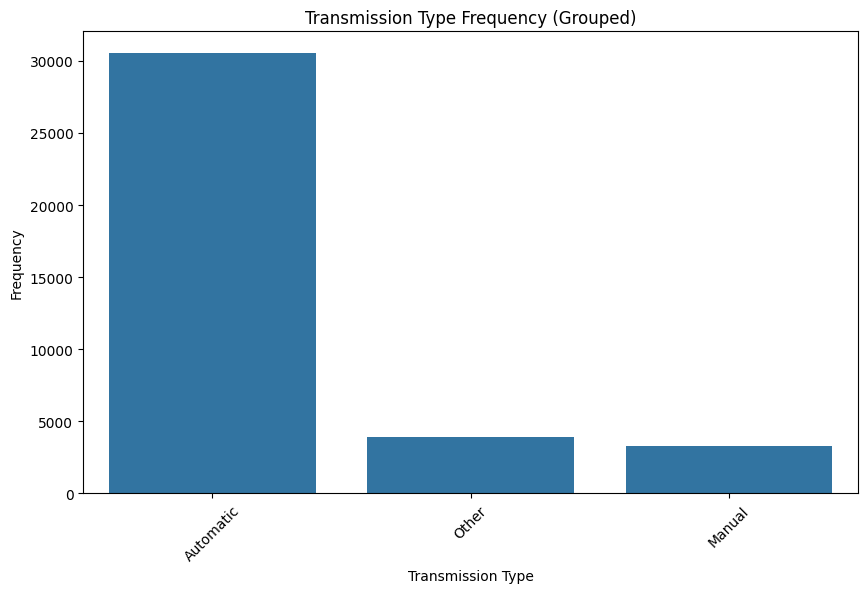

In [ ]:
# 시각화
plt.figure(figsize=(10, 6))
sns.countplot(data=df_cleaned, x='transmission_grouped', order= df_cleaned['transmission_grouped'].value_counts().index)
plt.title('Transmission Type Frequency (Grouped)')
plt.xlabel('Transmission Type')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()

In [ ]:
# transmission_grouped 열이 'Other'인 행의 transmission 값들만 추출
other_transmissions = df_cleaned[df_cleaned['transmission_grouped'] == 'Other']['transmission'].unique()

# 결과 확인
print("Other에 들어간 변속기 종류:", other_transmissions)

Other에 들어간 변속기 종류: ['Transmission with Dual Shift Mode' 'F' '–'
 'Transmission Overdrive Switch' '7-Speed' '2' 'Single-Speed Fixed Gear'
 'SCHEDULED FOR OR IN PRODUCTION']


In [ ]:
df_cleaned

,id,brand,model,release_year,milage,fuel_type,transmission,exterior_color,interior_color,accident_report,clean_title,horsepower,engine_displacement,number_cylinders,transmission_grouped
0,0,Mercedes-Benz,AMG C 43 AMG C 43 4MATIC,2019,36.0,Gasoline,8-Speed Automatic Transmission,Silver,Black,None reported,Yes,385.000000,3.000000,6 Cylinder,Automatic
1,1,Mercedes-Benz,EQS 450+ Base,2017,66.0,Gasoline,Transmission with Dual Shift Mode,Gray,Beige,None reported,Yes,329.000000,3.000000,6 Cylinder,Other
2,2,Tesla,Model X Long Range Plus,2019,55.0,electric,2-Speed Automatic Transmission,Blue,Black,None reported,Yes,425.000000,3.808847,6 Cylinder,Automatic
3,3,Ford,Bronco Outer Banks Advanced,2022,16.0,Gasoline,10-Speed Automatic Transmission,White,Brown,1 or more accident reported,Yes,315.000000,2.700000,6 Cylinder,Automatic
4,4,GMC,Sierra 1500 SLE Crew Cab,2006,215.0,Gasoline,Automatic Transmission,Black,Gray,1 or more accident reported,Yes,295.000000,5.300000,8 Cylinder,Automatic
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37702,37702,Hyundai,Veloster Base,2012,107.0,Gasoline,Transmission with Dual Shift Mode,White,Black,None reported,Yes,132.000000,1.600000,4 Cylinder,Other
37703,37703,Mazda,CX-5 Grand Touring,2021,30.0,Gasoline,6-Speed Automatic,Black,Black,1 or more accident reported,Yes,343.177077,2.500000,6 Cylinder,Automatic
37704,37704,Porsche,Panamera 2,2014,29.0,Gasoline,Transmission with Dual Shift Mode,Blue,Black,None reported,Yes,520.000000,4.800000,8 Cylinder,Other
37705,37705,Ford,Explorer Limited,2021,37.0,Gasoline,10-Speed Automatic Transmission,Green,Green,None reported,Yes,400.000000,3.000000,6 Cylinder,Automatic


## accident_report

- accident_report: none reported: 1, 1 or more accident reported: 0으로 인코딩
- clean_title: 'Yes': 1, 'No': 0 으로 인코딩


In [ ]:
# 모든 값을 문자열로 변환한 뒤 소문자로 바꾸고 공백 제거 후 매핑
df_cleaned['accident_report'] = df_cleaned['accident_report'].astype(str).str.lower().str.strip().map({
    'none reported': 1,
    '1 or more accident reported': 0
})

df_cleaned['clean_title'] = df_cleaned['clean_title'].astype(str).str.lower().str.strip().map({
    'yes': 1,
    'no': 0
})

# 결과 확인
print(df_cleaned[['accident_report', 'clean_title']].head())


   accident_report  clean_title
0                1            1
1                1            1
2                1            1
3                0            1
4                0            1


In [ ]:
df_cleaned

,id,brand,model,release_year,milage,fuel_type,transmission,exterior_color,interior_color,accident_report,clean_title,horsepower,engine_displacement,number_cylinders,transmission_grouped
0,0,Mercedes-Benz,AMG C 43 AMG C 43 4MATIC,2019,36.0,Gasoline,8-Speed Automatic Transmission,Silver,Black,1,1,385.000000,3.000000,6 Cylinder,Automatic
1,1,Mercedes-Benz,EQS 450+ Base,2017,66.0,Gasoline,Transmission with Dual Shift Mode,Gray,Beige,1,1,329.000000,3.000000,6 Cylinder,Other
2,2,Tesla,Model X Long Range Plus,2019,55.0,electric,2-Speed Automatic Transmission,Blue,Black,1,1,425.000000,3.808847,6 Cylinder,Automatic
3,3,Ford,Bronco Outer Banks Advanced,2022,16.0,Gasoline,10-Speed Automatic Transmission,White,Brown,0,1,315.000000,2.700000,6 Cylinder,Automatic
4,4,GMC,Sierra 1500 SLE Crew Cab,2006,215.0,Gasoline,Automatic Transmission,Black,Gray,0,1,295.000000,5.300000,8 Cylinder,Automatic
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37702,37702,Hyundai,Veloster Base,2012,107.0,Gasoline,Transmission with Dual Shift Mode,White,Black,1,1,132.000000,1.600000,4 Cylinder,Other
37703,37703,Mazda,CX-5 Grand Touring,2021,30.0,Gasoline,6-Speed Automatic,Black,Black,0,1,343.177077,2.500000,6 Cylinder,Automatic
37704,37704,Porsche,Panamera 2,2014,29.0,Gasoline,Transmission with Dual Shift Mode,Blue,Black,1,1,520.000000,4.800000,8 Cylinder,Other
37705,37705,Ford,Explorer Limited,2021,37.0,Gasoline,10-Speed Automatic Transmission,Green,Green,1,1,400.000000,3.000000,6 Cylinder,Automatic


## transmission_Grouped 원핫인코딩

In [ ]:
# One-hot Encoding을 적용하여 새로운 컬럼으로 분리
df_cleaned = pd.get_dummies(df_cleaned, columns=['transmission_grouped'], prefix='transmission')

# 결과 확인
print(df_cleaned.head())


   id          brand                        model  release_year  milage  \
0   0  Mercedes-Benz     AMG C 43 AMG C 43 4MATIC          2019    36.0   
1   1  Mercedes-Benz                EQS 450+ Base          2017    66.0   
2   2          Tesla      Model X Long Range Plus          2019    55.0   
3   3           Ford  Bronco Outer Banks Advanced          2022    16.0   
4   4            GMC     Sierra 1500 SLE Crew Cab          2006   215.0   

  fuel_type                       transmission exterior_color interior_color  \
0  Gasoline     8-Speed Automatic Transmission         Silver          Black   
1  Gasoline  Transmission with Dual Shift Mode           Gray          Beige   
2  electric     2-Speed Automatic Transmission           Blue          Black   
3  Gasoline    10-Speed Automatic Transmission          White          Brown   
4  Gasoline             Automatic Transmission          Black           Gray   

   accident_report  clean_title  horsepower  engine_displacement  \


In [ ]:

# True/False 값을 0/1로 변환
df_cleaned[['transmission_Automatic', 'transmission_Manual', 'transmission_Other']] = \
    df_cleaned[['transmission_Automatic', 'transmission_Manual', 'transmission_Other']].astype(int)

# 결과 확인
print(df_cleaned.head())


   id          brand                        model  release_year  milage  \
0   0  Mercedes-Benz     AMG C 43 AMG C 43 4MATIC          2019    36.0   
1   1  Mercedes-Benz                EQS 450+ Base          2017    66.0   
2   2          Tesla      Model X Long Range Plus          2019    55.0   
3   3           Ford  Bronco Outer Banks Advanced          2022    16.0   
4   4            GMC     Sierra 1500 SLE Crew Cab          2006   215.0   

  fuel_type                       transmission exterior_color interior_color  \
0  Gasoline     8-Speed Automatic Transmission         Silver          Black   
1  Gasoline  Transmission with Dual Shift Mode           Gray          Beige   
2  electric     2-Speed Automatic Transmission           Blue          Black   
3  Gasoline    10-Speed Automatic Transmission          White          Brown   
4  Gasoline             Automatic Transmission          Black           Gray   

   accident_report  clean_title  horsepower  engine_displacement  \


In [ ]:
df_cleaned

,id,brand,model,release_year,milage,fuel_type,transmission,exterior_color,interior_color,accident_report,clean_title,horsepower,engine_displacement,number_cylinders,transmission_Automatic,transmission_Manual,transmission_Other
0,0,Mercedes-Benz,AMG C 43 AMG C 43 4MATIC,2019,36.0,Gasoline,8-Speed Automatic Transmission,Silver,Black,1,1,385.000000,3.000000,6 Cylinder,1,0,0
1,1,Mercedes-Benz,EQS 450+ Base,2017,66.0,Gasoline,Transmission with Dual Shift Mode,Gray,Beige,1,1,329.000000,3.000000,6 Cylinder,0,0,1
2,2,Tesla,Model X Long Range Plus,2019,55.0,electric,2-Speed Automatic Transmission,Blue,Black,1,1,425.000000,3.808847,6 Cylinder,1,0,0
3,3,Ford,Bronco Outer Banks Advanced,2022,16.0,Gasoline,10-Speed Automatic Transmission,White,Brown,0,1,315.000000,2.700000,6 Cylinder,1,0,0
4,4,GMC,Sierra 1500 SLE Crew Cab,2006,215.0,Gasoline,Automatic Transmission,Black,Gray,0,1,295.000000,5.300000,8 Cylinder,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37702,37702,Hyundai,Veloster Base,2012,107.0,Gasoline,Transmission with Dual Shift Mode,White,Black,1,1,132.000000,1.600000,4 Cylinder,0,0,1
37703,37703,Mazda,CX-5 Grand Touring,2021,30.0,Gasoline,6-Speed Automatic,Black,Black,0,1,343.177077,2.500000,6 Cylinder,1,0,0
37704,37704,Porsche,Panamera 2,2014,29.0,Gasoline,Transmission with Dual Shift Mode,Blue,Black,1,1,520.000000,4.800000,8 Cylinder,0,0,1
37705,37705,Ford,Explorer Limited,2021,37.0,Gasoline,10-Speed Automatic Transmission,Green,Green,1,1,400.000000,3.000000,6 Cylinder,1,0,0


In [ ]:
# 불필요한 칼럼 삭제
df_cleaned = df_cleaned.drop(columns=['transmission'])

In [ ]:
df_cleaned

,id,brand,model,release_year,milage,fuel_type,exterior_color,interior_color,accident_report,clean_title,horsepower,engine_displacement,number_cylinders,transmission_Automatic,transmission_Manual,transmission_Other
0,0,Mercedes-Benz,AMG C 43 AMG C 43 4MATIC,2019,36.0,Gasoline,Silver,Black,1,1,385.000000,3.000000,6 Cylinder,1,0,0
1,1,Mercedes-Benz,EQS 450+ Base,2017,66.0,Gasoline,Gray,Beige,1,1,329.000000,3.000000,6 Cylinder,0,0,1
2,2,Tesla,Model X Long Range Plus,2019,55.0,electric,Blue,Black,1,1,425.000000,3.808847,6 Cylinder,1,0,0
3,3,Ford,Bronco Outer Banks Advanced,2022,16.0,Gasoline,White,Brown,0,1,315.000000,2.700000,6 Cylinder,1,0,0
4,4,GMC,Sierra 1500 SLE Crew Cab,2006,215.0,Gasoline,Black,Gray,0,1,295.000000,5.300000,8 Cylinder,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37702,37702,Hyundai,Veloster Base,2012,107.0,Gasoline,White,Black,1,1,132.000000,1.600000,4 Cylinder,0,0,1
37703,37703,Mazda,CX-5 Grand Touring,2021,30.0,Gasoline,Black,Black,0,1,343.177077,2.500000,6 Cylinder,1,0,0
37704,37704,Porsche,Panamera 2,2014,29.0,Gasoline,Blue,Black,1,1,520.000000,4.800000,8 Cylinder,0,0,1
37705,37705,Ford,Explorer Limited,2021,37.0,Gasoline,Green,Green,1,1,400.000000,3.000000,6 Cylinder,1,0,0


## 외장, 내장 변수 인코딩
-  외장 : 블랙 , 화이트, 실버
-  내장 : 블랙


In [ ]:
import numpy as np

# 'Black'인 경우 1, 아닌 경우 0으로 인코딩
df_cleaned['interior_color_black'] = np.where(df_cleaned['interior_color'] == 'Black', 1, 0)

# 결과 확인
print(df_cleaned[['interior_color', 'interior_color_black']].head())


  interior_color  interior_color_black
0          Black                     1
1          Beige                     0
2          Black                     1
3          Brown                     0
4           Gray                     0


In [ ]:
import numpy as np

# 'Black', 'White', 'Gray'는 무채색으로 1, 그 외는 0으로 인코딩
df_cleaned['exterior_color_BWG'] = np.where(df_cleaned['exterior_color'].isin(['Black', 'White', 'Gray']), 1, 0)

# 결과 확인
print(df_cleaned[['exterior_color', 'exterior_color_BWG']].head())


  exterior_color  exterior_color_BWG
0         Silver                   0
1           Gray                   1
2           Blue                   0
3          White                   1
4          Black                   1


In [ ]:
df_cleaned

,id,brand,model,release_year,milage,fuel_type,exterior_color,interior_color,accident_report,clean_title,horsepower,engine_displacement,number_cylinders,transmission_Automatic,transmission_Manual,transmission_Other,interior_color_black,exterior_color_BWG
0,0,Mercedes-Benz,AMG C 43 AMG C 43 4MATIC,2019,36.0,Gasoline,Silver,Black,1,1,385.000000,3.000000,6 Cylinder,1,0,0,1,0
1,1,Mercedes-Benz,EQS 450+ Base,2017,66.0,Gasoline,Gray,Beige,1,1,329.000000,3.000000,6 Cylinder,0,0,1,0,1
2,2,Tesla,Model X Long Range Plus,2019,55.0,electric,Blue,Black,1,1,425.000000,3.808847,6 Cylinder,1,0,0,1,0
3,3,Ford,Bronco Outer Banks Advanced,2022,16.0,Gasoline,White,Brown,0,1,315.000000,2.700000,6 Cylinder,1,0,0,0,1
4,4,GMC,Sierra 1500 SLE Crew Cab,2006,215.0,Gasoline,Black,Gray,0,1,295.000000,5.300000,8 Cylinder,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37702,37702,Hyundai,Veloster Base,2012,107.0,Gasoline,White,Black,1,1,132.000000,1.600000,4 Cylinder,0,0,1,1,1
37703,37703,Mazda,CX-5 Grand Touring,2021,30.0,Gasoline,Black,Black,0,1,343.177077,2.500000,6 Cylinder,1,0,0,1,1
37704,37704,Porsche,Panamera 2,2014,29.0,Gasoline,Blue,Black,1,1,520.000000,4.800000,8 Cylinder,0,0,1,1,0
37705,37705,Ford,Explorer Limited,2021,37.0,Gasoline,Green,Green,1,1,400.000000,3.000000,6 Cylinder,1,0,0,0,0


In [ ]:
df_cleaned = df_cleaned.drop(columns=['exterior_color', 'interior_color'])

In [ ]:
df_cleaned

,id,brand,model,release_year,milage,fuel_type,accident_report,clean_title,horsepower,engine_displacement,number_cylinders,transmission_Automatic,transmission_Manual,transmission_Other,interior_color_black,exterior_color_BWG
0,0,Mercedes-Benz,AMG C 43 AMG C 43 4MATIC,2019,36.0,Gasoline,1,1,385.000000,3.000000,6 Cylinder,1,0,0,1,0
1,1,Mercedes-Benz,EQS 450+ Base,2017,66.0,Gasoline,1,1,329.000000,3.000000,6 Cylinder,0,0,1,0,1
2,2,Tesla,Model X Long Range Plus,2019,55.0,electric,1,1,425.000000,3.808847,6 Cylinder,1,0,0,1,0
3,3,Ford,Bronco Outer Banks Advanced,2022,16.0,Gasoline,0,1,315.000000,2.700000,6 Cylinder,1,0,0,0,1
4,4,GMC,Sierra 1500 SLE Crew Cab,2006,215.0,Gasoline,0,1,295.000000,5.300000,8 Cylinder,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37702,37702,Hyundai,Veloster Base,2012,107.0,Gasoline,1,1,132.000000,1.600000,4 Cylinder,0,0,1,1,1
37703,37703,Mazda,CX-5 Grand Touring,2021,30.0,Gasoline,0,1,343.177077,2.500000,6 Cylinder,1,0,0,1,1
37704,37704,Porsche,Panamera 2,2014,29.0,Gasoline,1,1,520.000000,4.800000,8 Cylinder,0,0,1,1,0
37705,37705,Ford,Explorer Limited,2021,37.0,Gasoline,1,1,400.000000,3.000000,6 Cylinder,1,0,0,0,0


In [ ]:
# 숫자 부분만 추출하여 정수형으로 변환
df_cleaned['number_cylinders'] = df_cleaned['number_cylinders'].str.extract('(\d+)').astype(float)

# 결과 확인
print(df_cleaned[['number_cylinders']].head())


   number_cylinders
0               6.0
1               6.0
2               6.0
3               6.0
4               8.0


In [ ]:
df_cleaned

,id,brand,model,release_year,milage,fuel_type,accident_report,clean_title,horsepower,engine_displacement,number_cylinders,transmission_Automatic,transmission_Manual,transmission_Other,interior_color_black,exterior_color_BWG
0,0,Mercedes-Benz,AMG C 43 AMG C 43 4MATIC,2019,36.0,Gasoline,1,1,385.000000,3.000000,6.0,1,0,0,1,0
1,1,Mercedes-Benz,EQS 450+ Base,2017,66.0,Gasoline,1,1,329.000000,3.000000,6.0,0,0,1,0,1
2,2,Tesla,Model X Long Range Plus,2019,55.0,electric,1,1,425.000000,3.808847,6.0,1,0,0,1,0
3,3,Ford,Bronco Outer Banks Advanced,2022,16.0,Gasoline,0,1,315.000000,2.700000,6.0,1,0,0,0,1
4,4,GMC,Sierra 1500 SLE Crew Cab,2006,215.0,Gasoline,0,1,295.000000,5.300000,8.0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37702,37702,Hyundai,Veloster Base,2012,107.0,Gasoline,1,1,132.000000,1.600000,4.0,0,0,1,1,1
37703,37703,Mazda,CX-5 Grand Touring,2021,30.0,Gasoline,0,1,343.177077,2.500000,6.0,1,0,0,1,1
37704,37704,Porsche,Panamera 2,2014,29.0,Gasoline,1,1,520.000000,4.800000,8.0,0,0,1,1,0
37705,37705,Ford,Explorer Limited,2021,37.0,Gasoline,1,1,400.000000,3.000000,6.0,1,0,0,0,0


In [ ]:
# 지정한 경로에 df_cleaned 데이터를 CSV로 저장
df_cleaned.to_csv('/content/drive/MyDrive/ILOVEDART/test1.csv', index=False)

print("Data saved to '/content/drive/MyDrive/ILOVEDART/test1.csv'")


Data saved to '/content/drive/MyDrive/ILOVEDART/test1.csv'


# 1. catboost

In [ ]:
import numpy as np
import pandas as pd

In [ ]:
# import libraries

import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import accuracy_score, confusion_matrix

import seaborn as sns

In [ ]:
# Read the data
train = pd.read_csv('/content/drive/MyDrive/ILOVEDART/df_cleaned.csv')
test = pd.read_csv('/content/drive/MyDrive/ILOVEDART/test1.csv')


In [ ]:
# 독립 변수와 타겟 변수 설정
X = train.drop(columns=['price','id'])  # 'price'를 제외한 모든 열이 독립 변수
y = train['price']  # 'price'가 타겟 변수


In [ ]:
# CatBoost 설치
!pip install catboost


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 10.1 MB/s eta 0:00:00


In [ ]:

# 학습 데이터와 테스트 데이터로 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# CatBoost에 사용할 범주형 변수 인덱스
cat_features = X.select_dtypes(include='object').columns.tolist()  # 범주형 열 이름 자동 선택


In [ ]:
from catboost import CatBoostRegressor
# CatBoostRegressor 모델 초기화
model = CatBoostRegressor(iterations=1000, learning_rate=0.1, depth=6)



In [ ]:

# 모델 학습 (cat_features 지정)
model.fit(X_train, y_train, cat_features=cat_features)

0:	learn: 77454.5633715	total: 352ms	remaining: 5m 51s
1:	learn: 76736.0947468	total: 607ms	remaining: 5m 2s
2:	learn: 76057.3389112	total: 859ms	remaining: 4m 45s
3:	learn: 75559.5803301	total: 1.15s	remaining: 4m 45s
4:	learn: 75117.6843618	total: 1.33s	remaining: 4m 24s
5:	learn: 74746.3092773	total: 1.55s	remaining: 4m 16s
6:	learn: 74428.7732147	total: 1.79s	remaining: 4m 13s
7:	learn: 74167.9762759	total: 2.05s	remaining: 4m 14s
8:	learn: 73953.1490969	total: 2.29s	remaining: 4m 12s
9:	learn: 73769.4737435	total: 2.5s	remaining: 4m 7s
10:	learn: 73577.3763065	total: 2.69s	remaining: 4m 2s
11:	learn: 73442.8326393	total: 2.83s	remaining: 3m 53s
12:	learn: 73312.4415836	total: 2.99s	remaining: 3m 47s
13:	learn: 73188.2583368	total: 3.15s	remaining: 3m 41s
14:	learn: 73084.4382387	total: 3.31s	remaining: 3m 37s
15:	learn: 72983.3139067	total: 3.42s	remaining: 3m 30s
16:	learn: 72915.6368685	total: 3.58s	remaining: 3m 27s
17:	learn: 72858.2843054	total: 3.73s	remaining: 3m 23s
18:	le

In [ ]:
from sklearn.metrics import mean_squared_error

In [ ]:
# 테스트 데이터로 예측
y_pred = model.predict(X_test)

# RMSE 계산
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"RMSE: {rmse}")

RMSE: 70652.66828780677


In [ ]:

# 테스트 데이터 예측
final_predictions = model.predict(test)


In [ ]:
# 특성 중요도 추출
feature_importance = model.get_feature_importance()
feature_names = X_train.columns

# 특성 중요도를 데이터프레임으로 정리
feature_importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': feature_importance
}).sort_values(by='Importance', ascending=False)

# 결과 확인
print(feature_importance_df)


                   Feature  Importance
3                   milage   27.396068
0                    brand   15.350267
7               horsepower   13.719998
2             release_year   13.476713
8      engine_displacement   11.609190
1                    model    9.236720
9         number_cylinders    2.740584
4                fuel_type    2.190975
14      exterior_color_BWG    0.896843
11     transmission_Manual    0.892782
12      transmission_Other    0.795156
13    interior_color_black    0.630022
10  transmission_Automatic    0.616056
5          accident_report    0.400625
6              clean_title    0.048002


--------------------------

In [ ]:

test = test.drop(columns=['id'])

In [ ]:

# 범주형 변수를 학습된 cat_features와 동일하게 처리
test[cat_features] = test[cat_features].astype(str)

# test 데이터에서 예측
final_predictions = model.predict(test)


In [ ]:
submission = pd.read_csv('/content/drive/MyDrive/ILOVEDART/sample_submission.csv')

In [ ]:

# 제출 파일 생성
submission['price'] = final_predictions
submission.to_csv('/content/drive/MyDrive/ILOVEDART/sample_submission.csv', index=False)

print("Predictions saved to 'submission.csv'")

Predictions saved to 'submission.csv'
